# Optical Character Recognition

## An data overview (1ST step)

In [1]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from work_methods import matrix_recover
from information_gain import information_gain
from work_methods import info_gain_matrix_recover

In [2]:
database = pd.read_csv('mnist_evaluation.csv', sep=',')
test_data = pd.read_csv('mnist_test.csv', sep=',')

In [3]:
# overview types
database.dtypes.value_counts()

int64    785
dtype: int64

In [4]:
# take a look at the last columns 
database.dtypes.tail()

pixel_28_25    int64
pixel_28_26    int64
pixel_28_27    int64
pixel_28_28    int64
y_class        int64
dtype: object

In [5]:
# lets take a look at the 'class' balance. I had to rename to 'y_class', because class is already in use in python 
database.y_class

0       8
1       7
2       5
3       6
4       5
       ..
2044    4
2045    1
2046    6
2047    8
2048    8
Name: y_class, Length: 2049, dtype: int64

In [6]:
# take a look at the minimum value avaible
database.iloc[:, :-1].min().value_counts()

0    784
dtype: int64

In [7]:
# take a look at the maximum value avaible
database.iloc[:, :-1].max().value_counts()

255    467
254    207
253     70
252     23
251     12
250      4
247      1
dtype: int64

In [8]:
# lets overview values
database.describe()

,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_1_8,pixel_1_9,pixel_1_10,...,pixel_28_20,pixel_28_21,pixel_28_22,pixel_28_23,pixel_28_24,pixel_28_25,pixel_28_26,pixel_28_27,pixel_28_28,y_class
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,5.418253,5.599317,5.452416,5.510005,5.542704,5.527086,5.403612,5.579307,5.550512,5.513421,...,5.937531,5.731576,5.618838,5.571498,5.485603,5.507565,5.508053,5.584675,5.573450,4.573450
std,34.360711,35.502751,34.561946,34.924724,35.135678,35.024662,34.264219,35.374181,35.190643,34.964895,...,36.003499,35.599994,35.547952,35.319550,34.772333,34.904754,34.938311,35.386521,35.324978,2.907022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,251.000000,253.000000,253.000000,254.000000,254.000000,252.000000,252.000000,254.000000,253.000000,254.000000,...,253.000000,254.000000,254.000000,254.000000,252.000000,253.000000,254.000000,253.000000,254.000000,9.000000


## Only the crude data (2ND step)

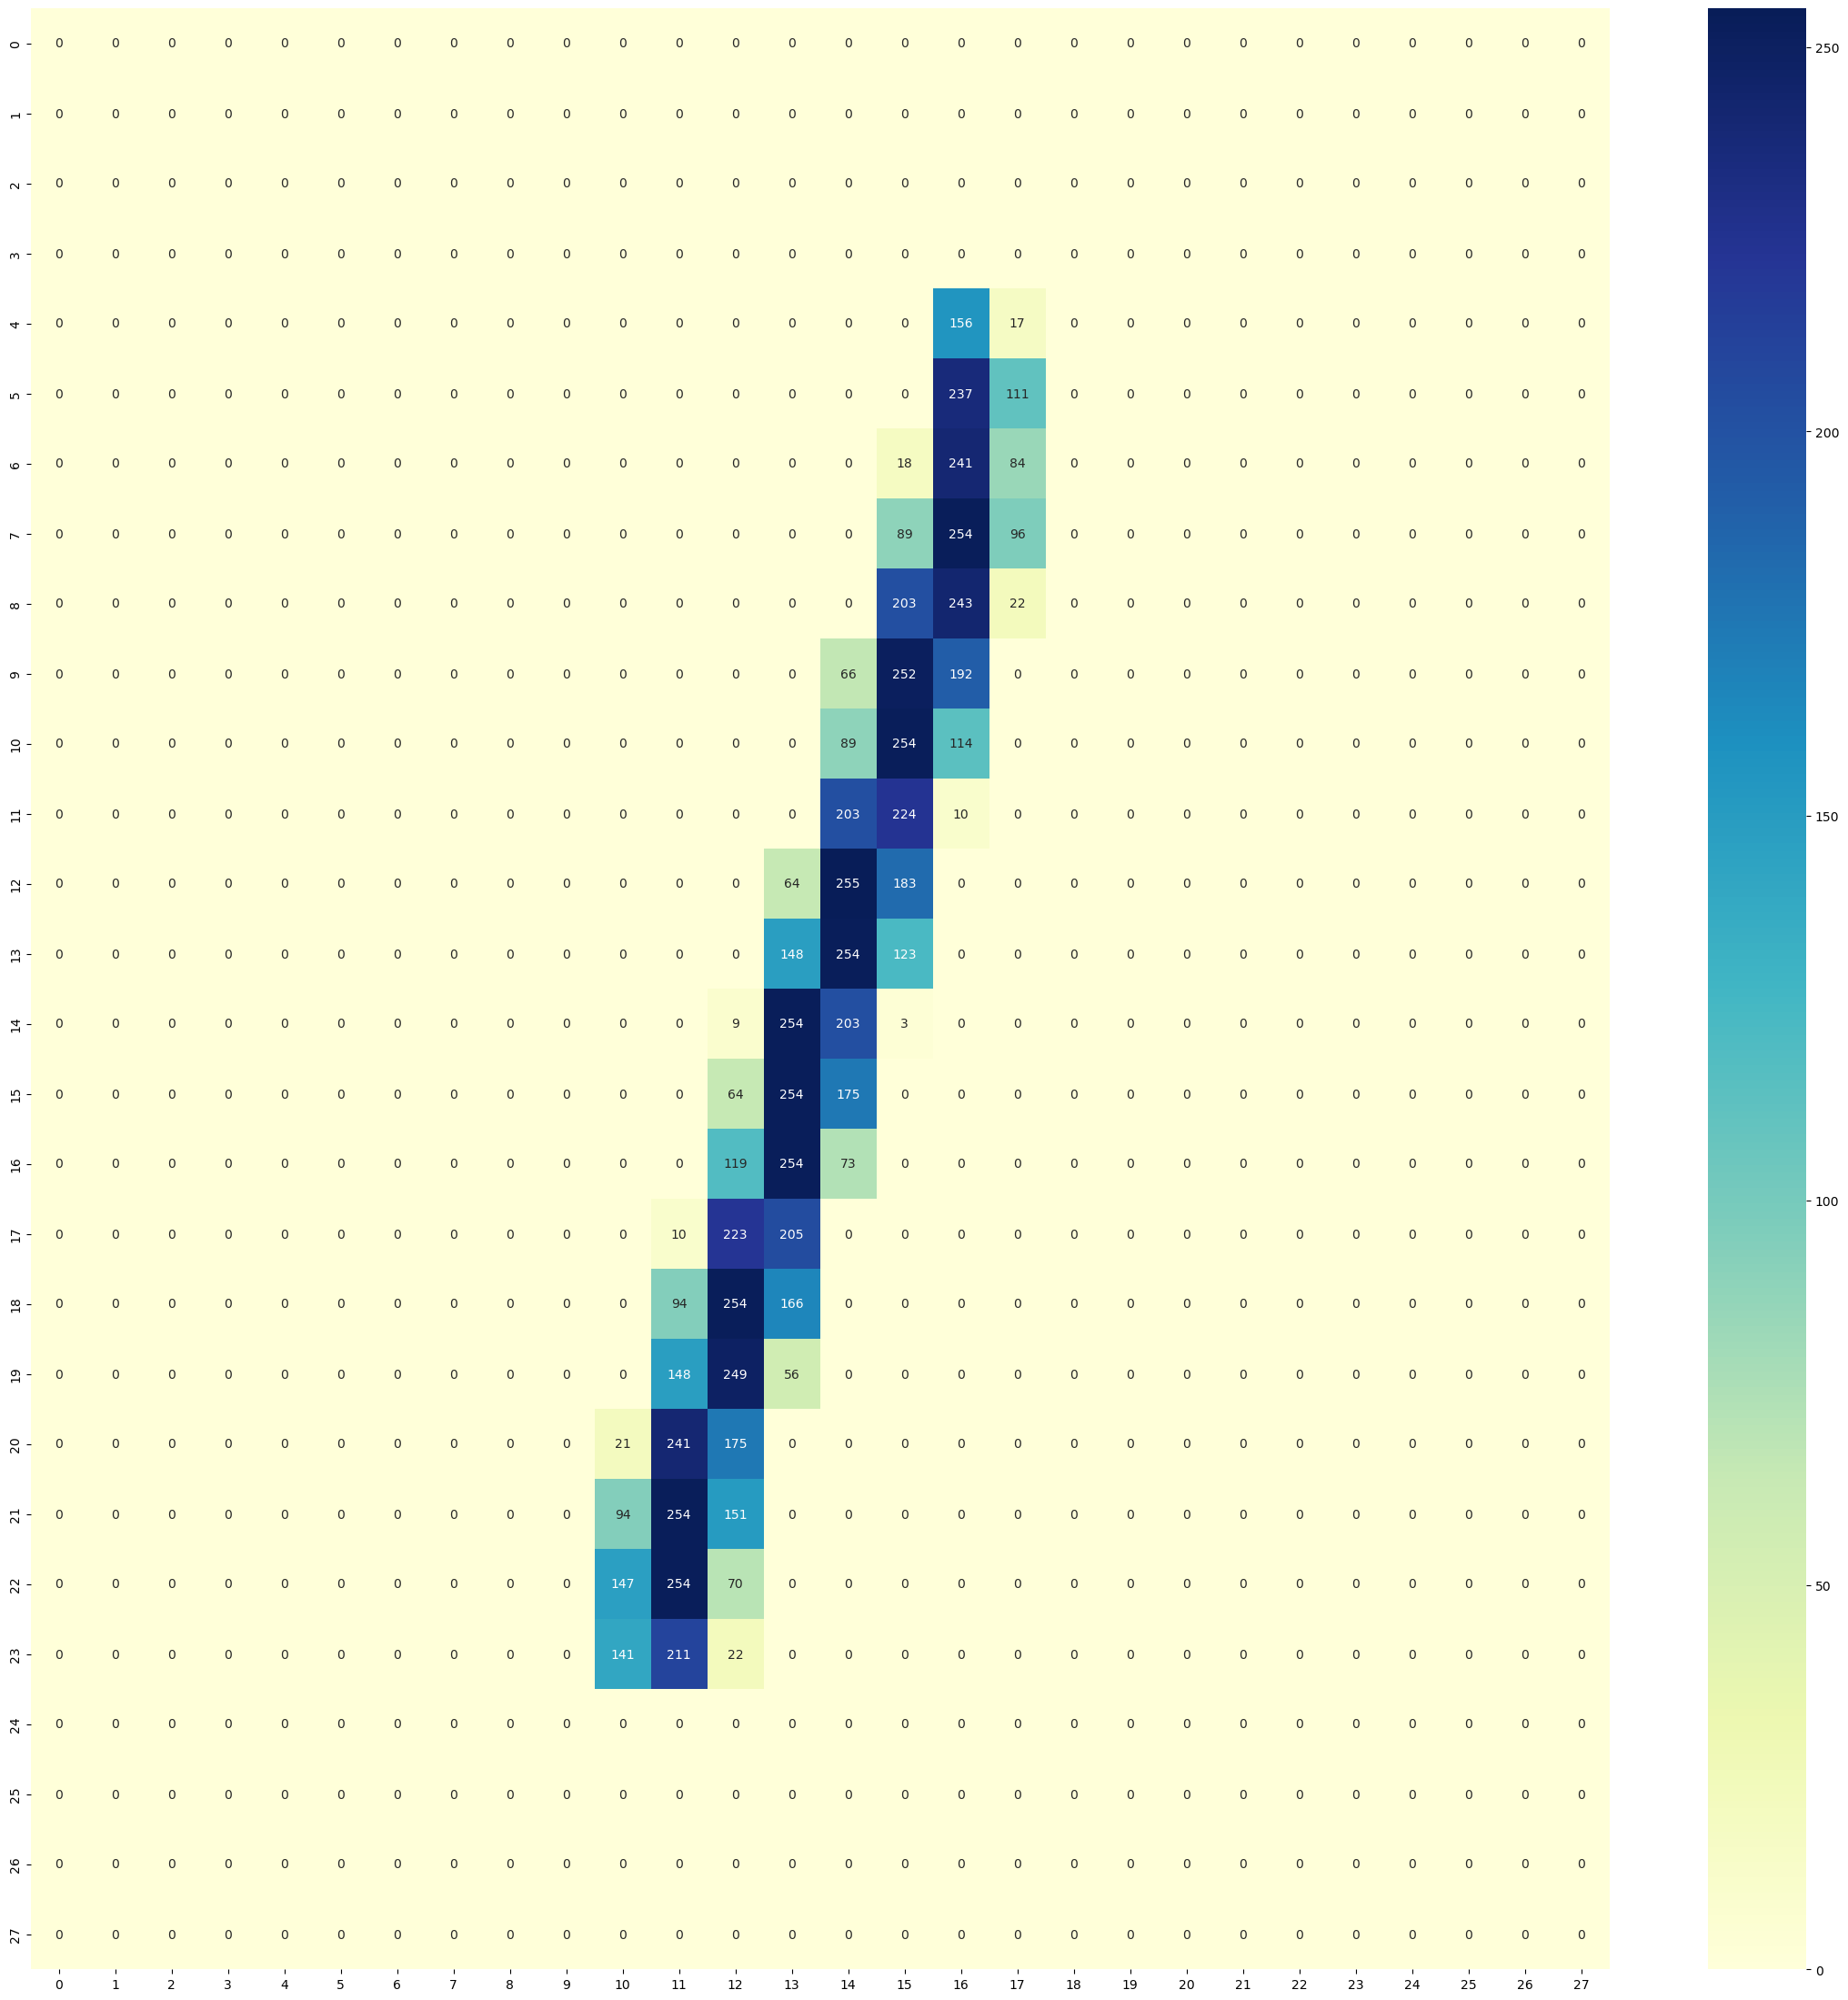

In [9]:
# lets recover 1 line and try to draw
# choose a number between 1 and 2050 to draw
to_recover = 5
square_reference = 28

# recover a matrix from data to plot
matrix = matrix_recover(database, to_recover, square_reference)

# heatmap plot of matrix
plt.figure(figsize=(28, 28))
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

## Use information gain to evaluete database (3RD step)

In [10]:
info_gain_database = pd.DataFrame(columns=['Feature', 'Information Gain'])
for column in database.columns:
    if column != 'y_class':
        info_gain_database.loc[len(info_gain_database)] = {'Feature': column, 'Information Gain': information_gain(database, 'y_class', column)}

print(info_gain_database)

         Feature  Information Gain
0      pixel_1_1          0.061958
1      pixel_1_2          0.066040
2      pixel_1_3          0.067624
3      pixel_1_4          0.067017
4      pixel_1_5          0.067256
..           ...               ...
779  pixel_28_24          0.069208
780  pixel_28_25          0.069576
781  pixel_28_26          0.063720
782  pixel_28_27          0.062566
783  pixel_28_28          0.064328

[784 rows x 2 columns]


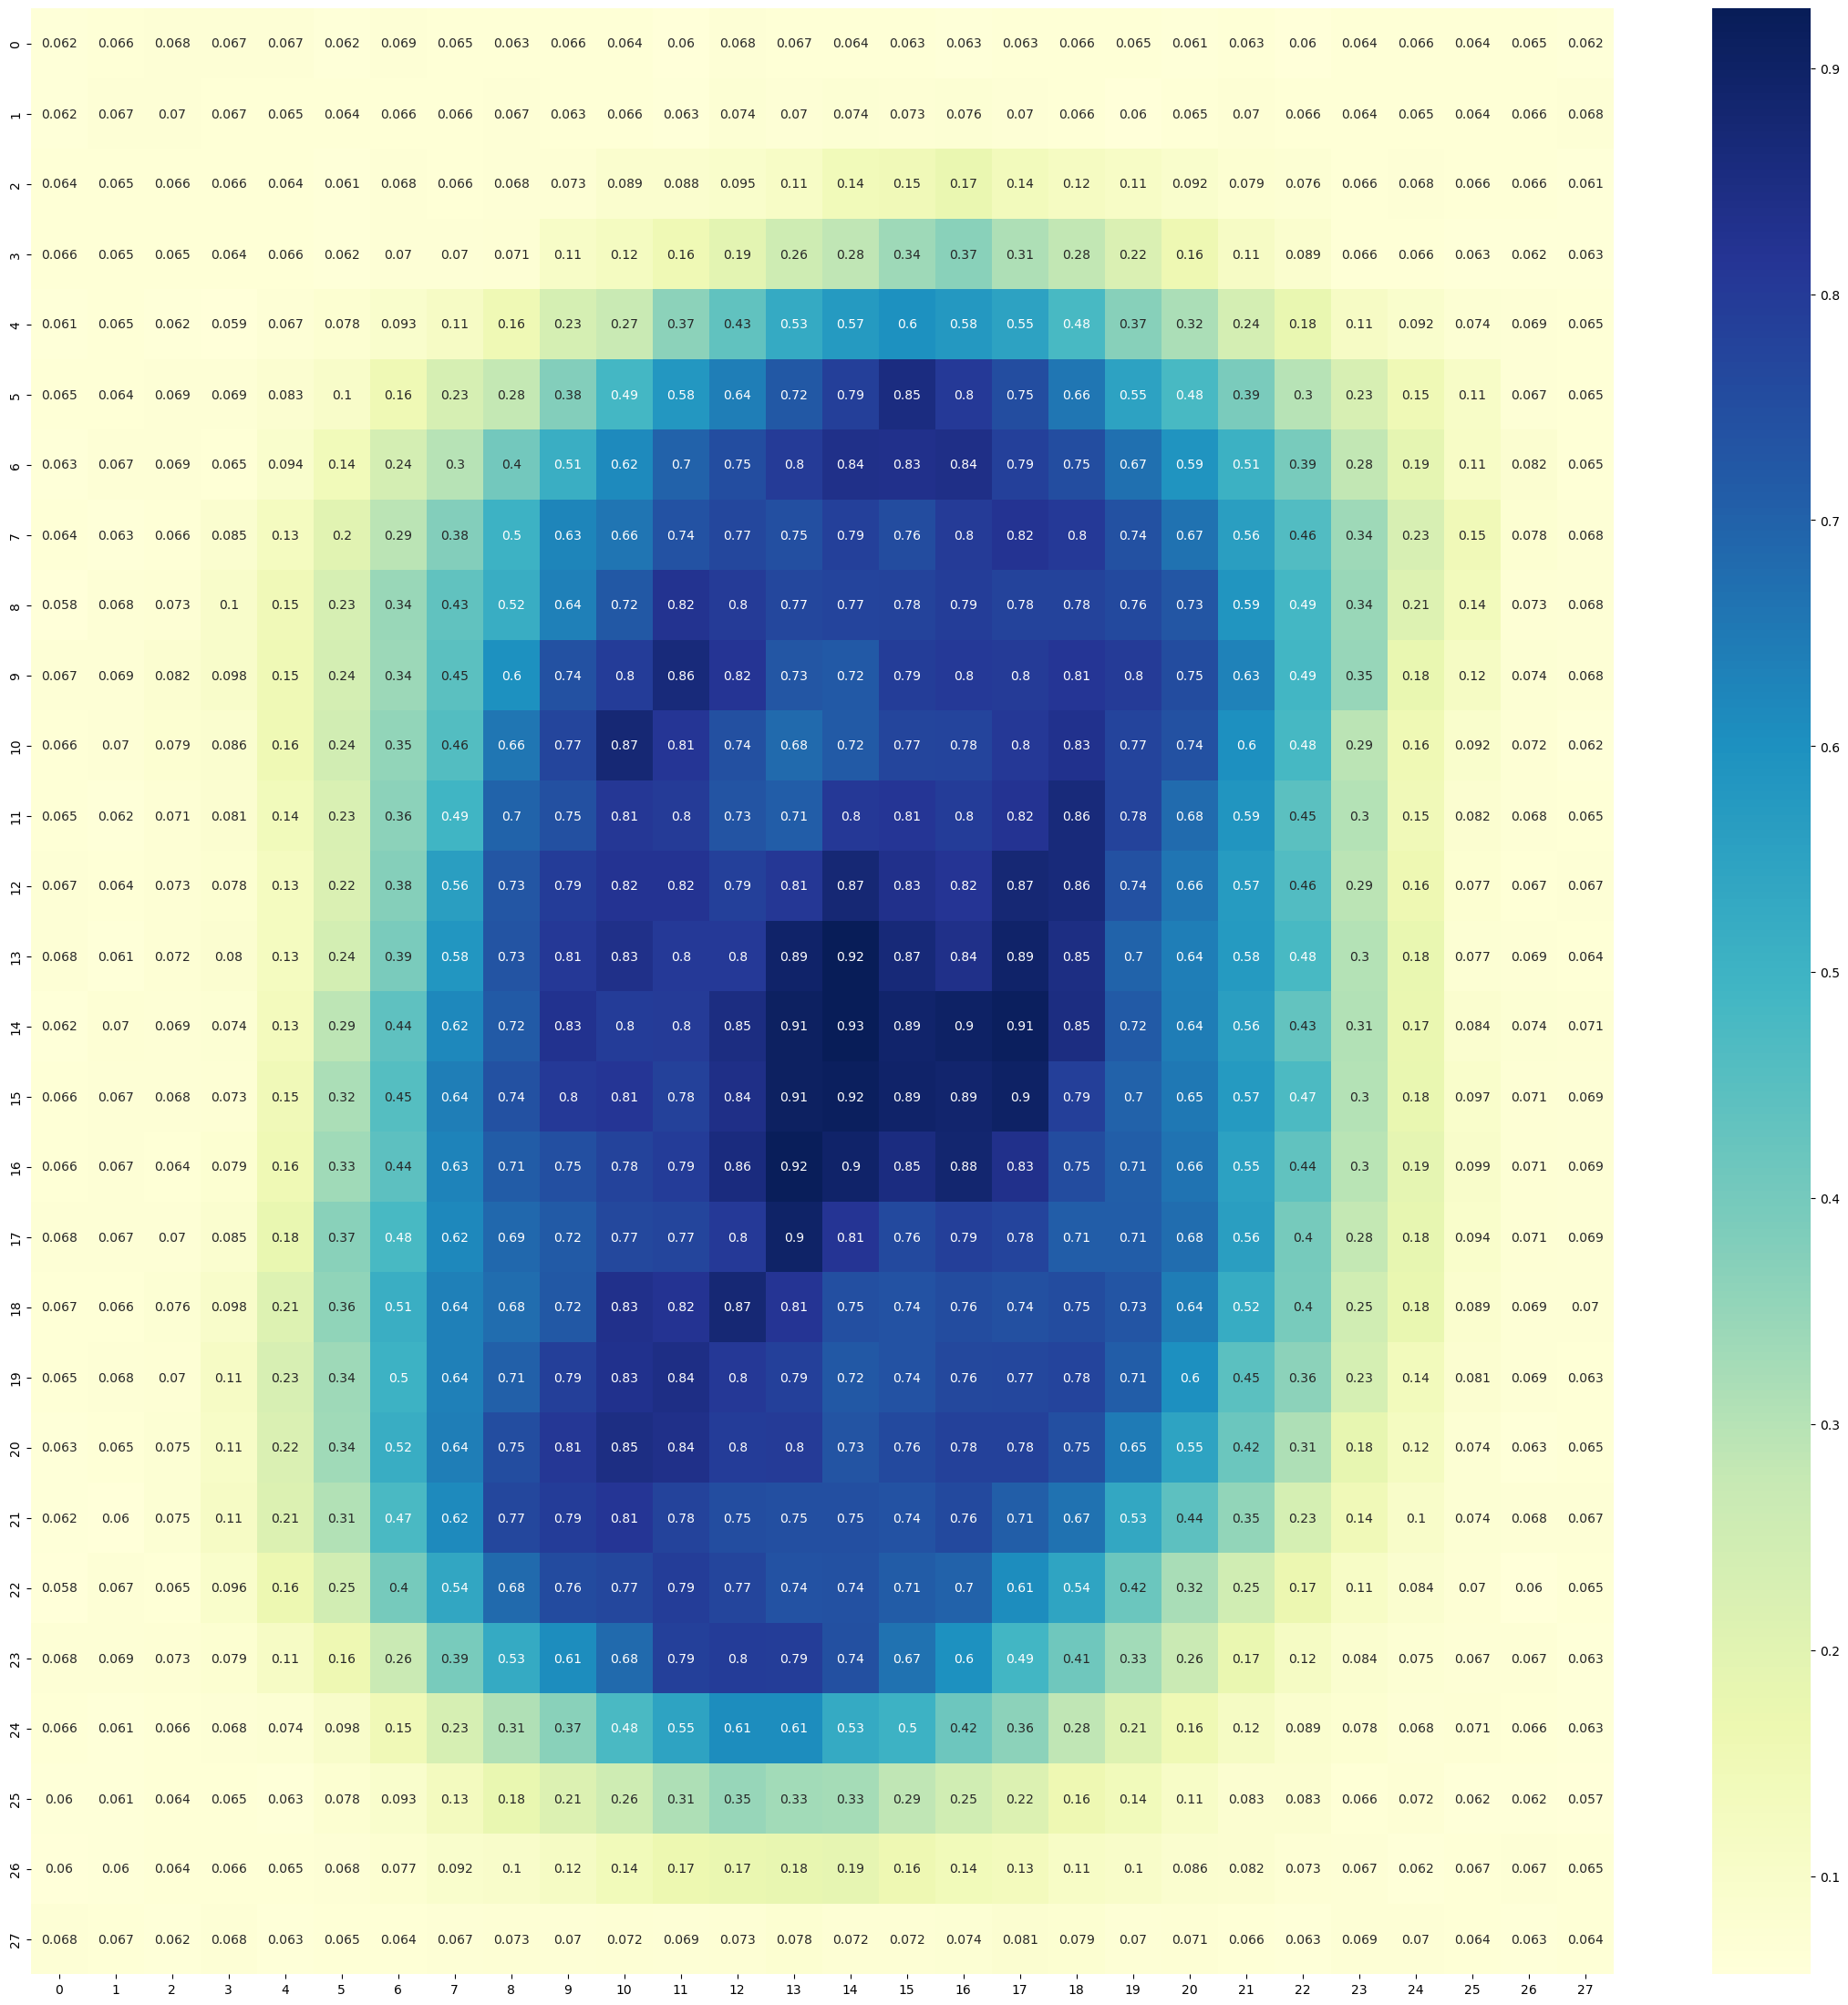

In [11]:
square_reference = 28

info_gain_matrix = info_gain_matrix_recover(info_gain_database, square_reference)

# heatmap
plt.figure(figsize=(28, 28))
sns.heatmap(info_gain_matrix, annot=True, cmap="YlGnBu")
plt.show()

A informação obtida pelo info_gain sugere que as primeira 4 linhas, as primeiras 4 colunas, as últimas 4 linhas e as últimas 4 colunas não são tão expressivas na determinação do dígito. Isso acontece porque as amostras coletadas não fizeram bom uso do espaço disponível tornando os pixels dos cantos irrelevantes. Poderia ser feito um corte mais interessante também arredondando as bordas da matriz, mas isso implicaria em uma matriz deformada. Então essa ideia não será considerada. O plano consiste em apenas fazer as eliminações das linhas e colunas sugeridas, ocorre uma redução de 384 atributos. Antes desse filtro, o total era de 784. Com a eliminação, esse número cai para 400. É uma redução aproximada de 49% dos atributos relevantes e ainda mantém a matriz quadrada.

In [12]:
database = pd.read_csv('mnist_sample_feature_select.csv', sep=',')

info_gain_database = pd.DataFrame(columns=['Feature', 'Information Gain'])
for column in database.columns:
    if column != 'y_class':
        info_gain_database.loc[len(info_gain_database)] = {'Feature': column, 'Information Gain': information_gain(database, 'y_class', column)}

print(info_gain_database)

         Feature  Information Gain
0      pixel_5_5          0.066839
1      pixel_5_6          0.078354
2      pixel_5_7          0.093067
3      pixel_5_8          0.113408
4      pixel_5_9          0.155213
..           ...               ...
395  pixel_24_20          0.330951
396  pixel_24_21          0.264888
397  pixel_24_22          0.172467
398  pixel_24_23          0.115130
399  pixel_24_24          0.084437

[400 rows x 2 columns]


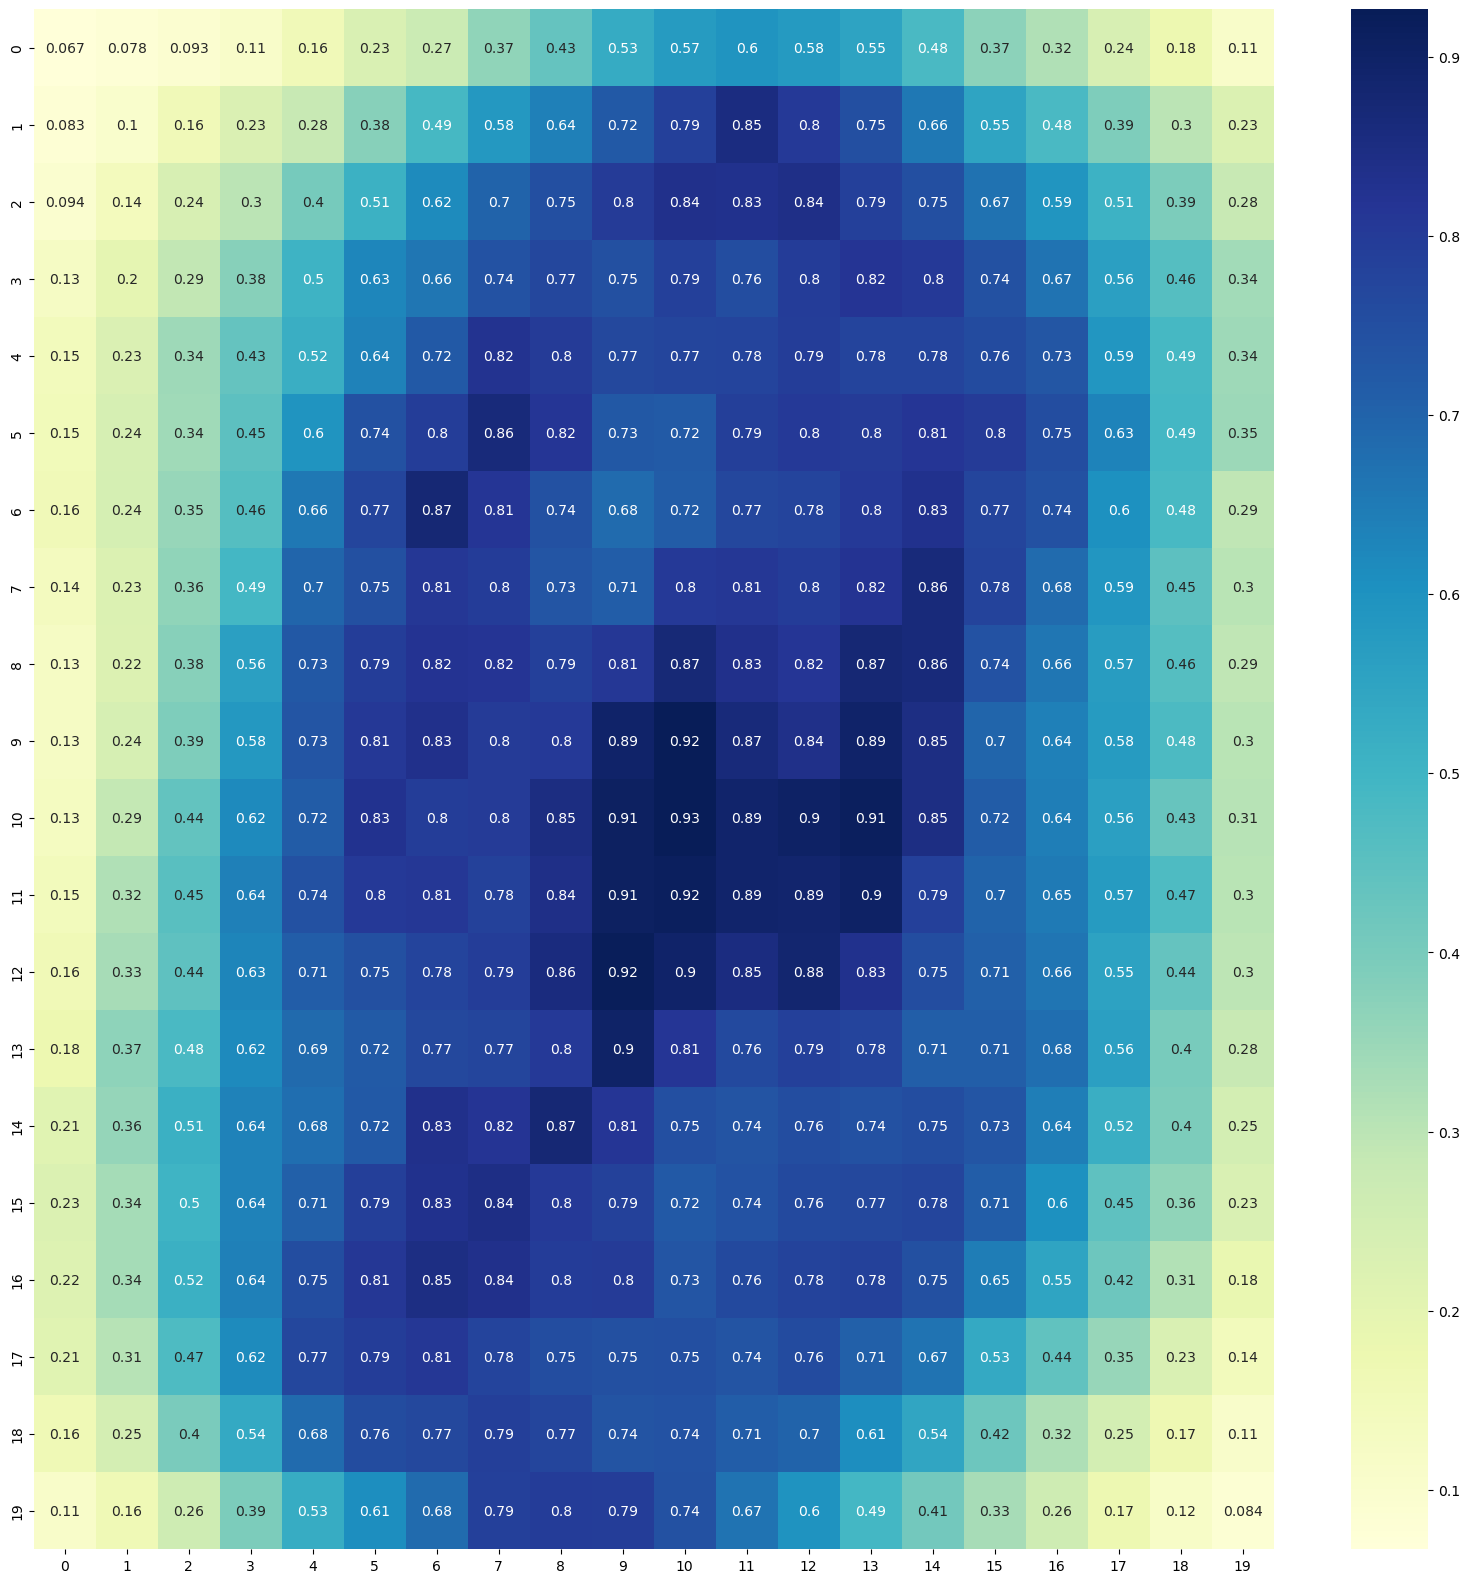

In [13]:
# matrix size
square_reference = 20

info_gain_matrix = info_gain_matrix_recover(info_gain_database, square_reference)
                    
# Crie um heatmap com seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(info_gain_matrix, annot=True, cmap="YlGnBu")
plt.show()


## Transform feature as input filter (4TH step)

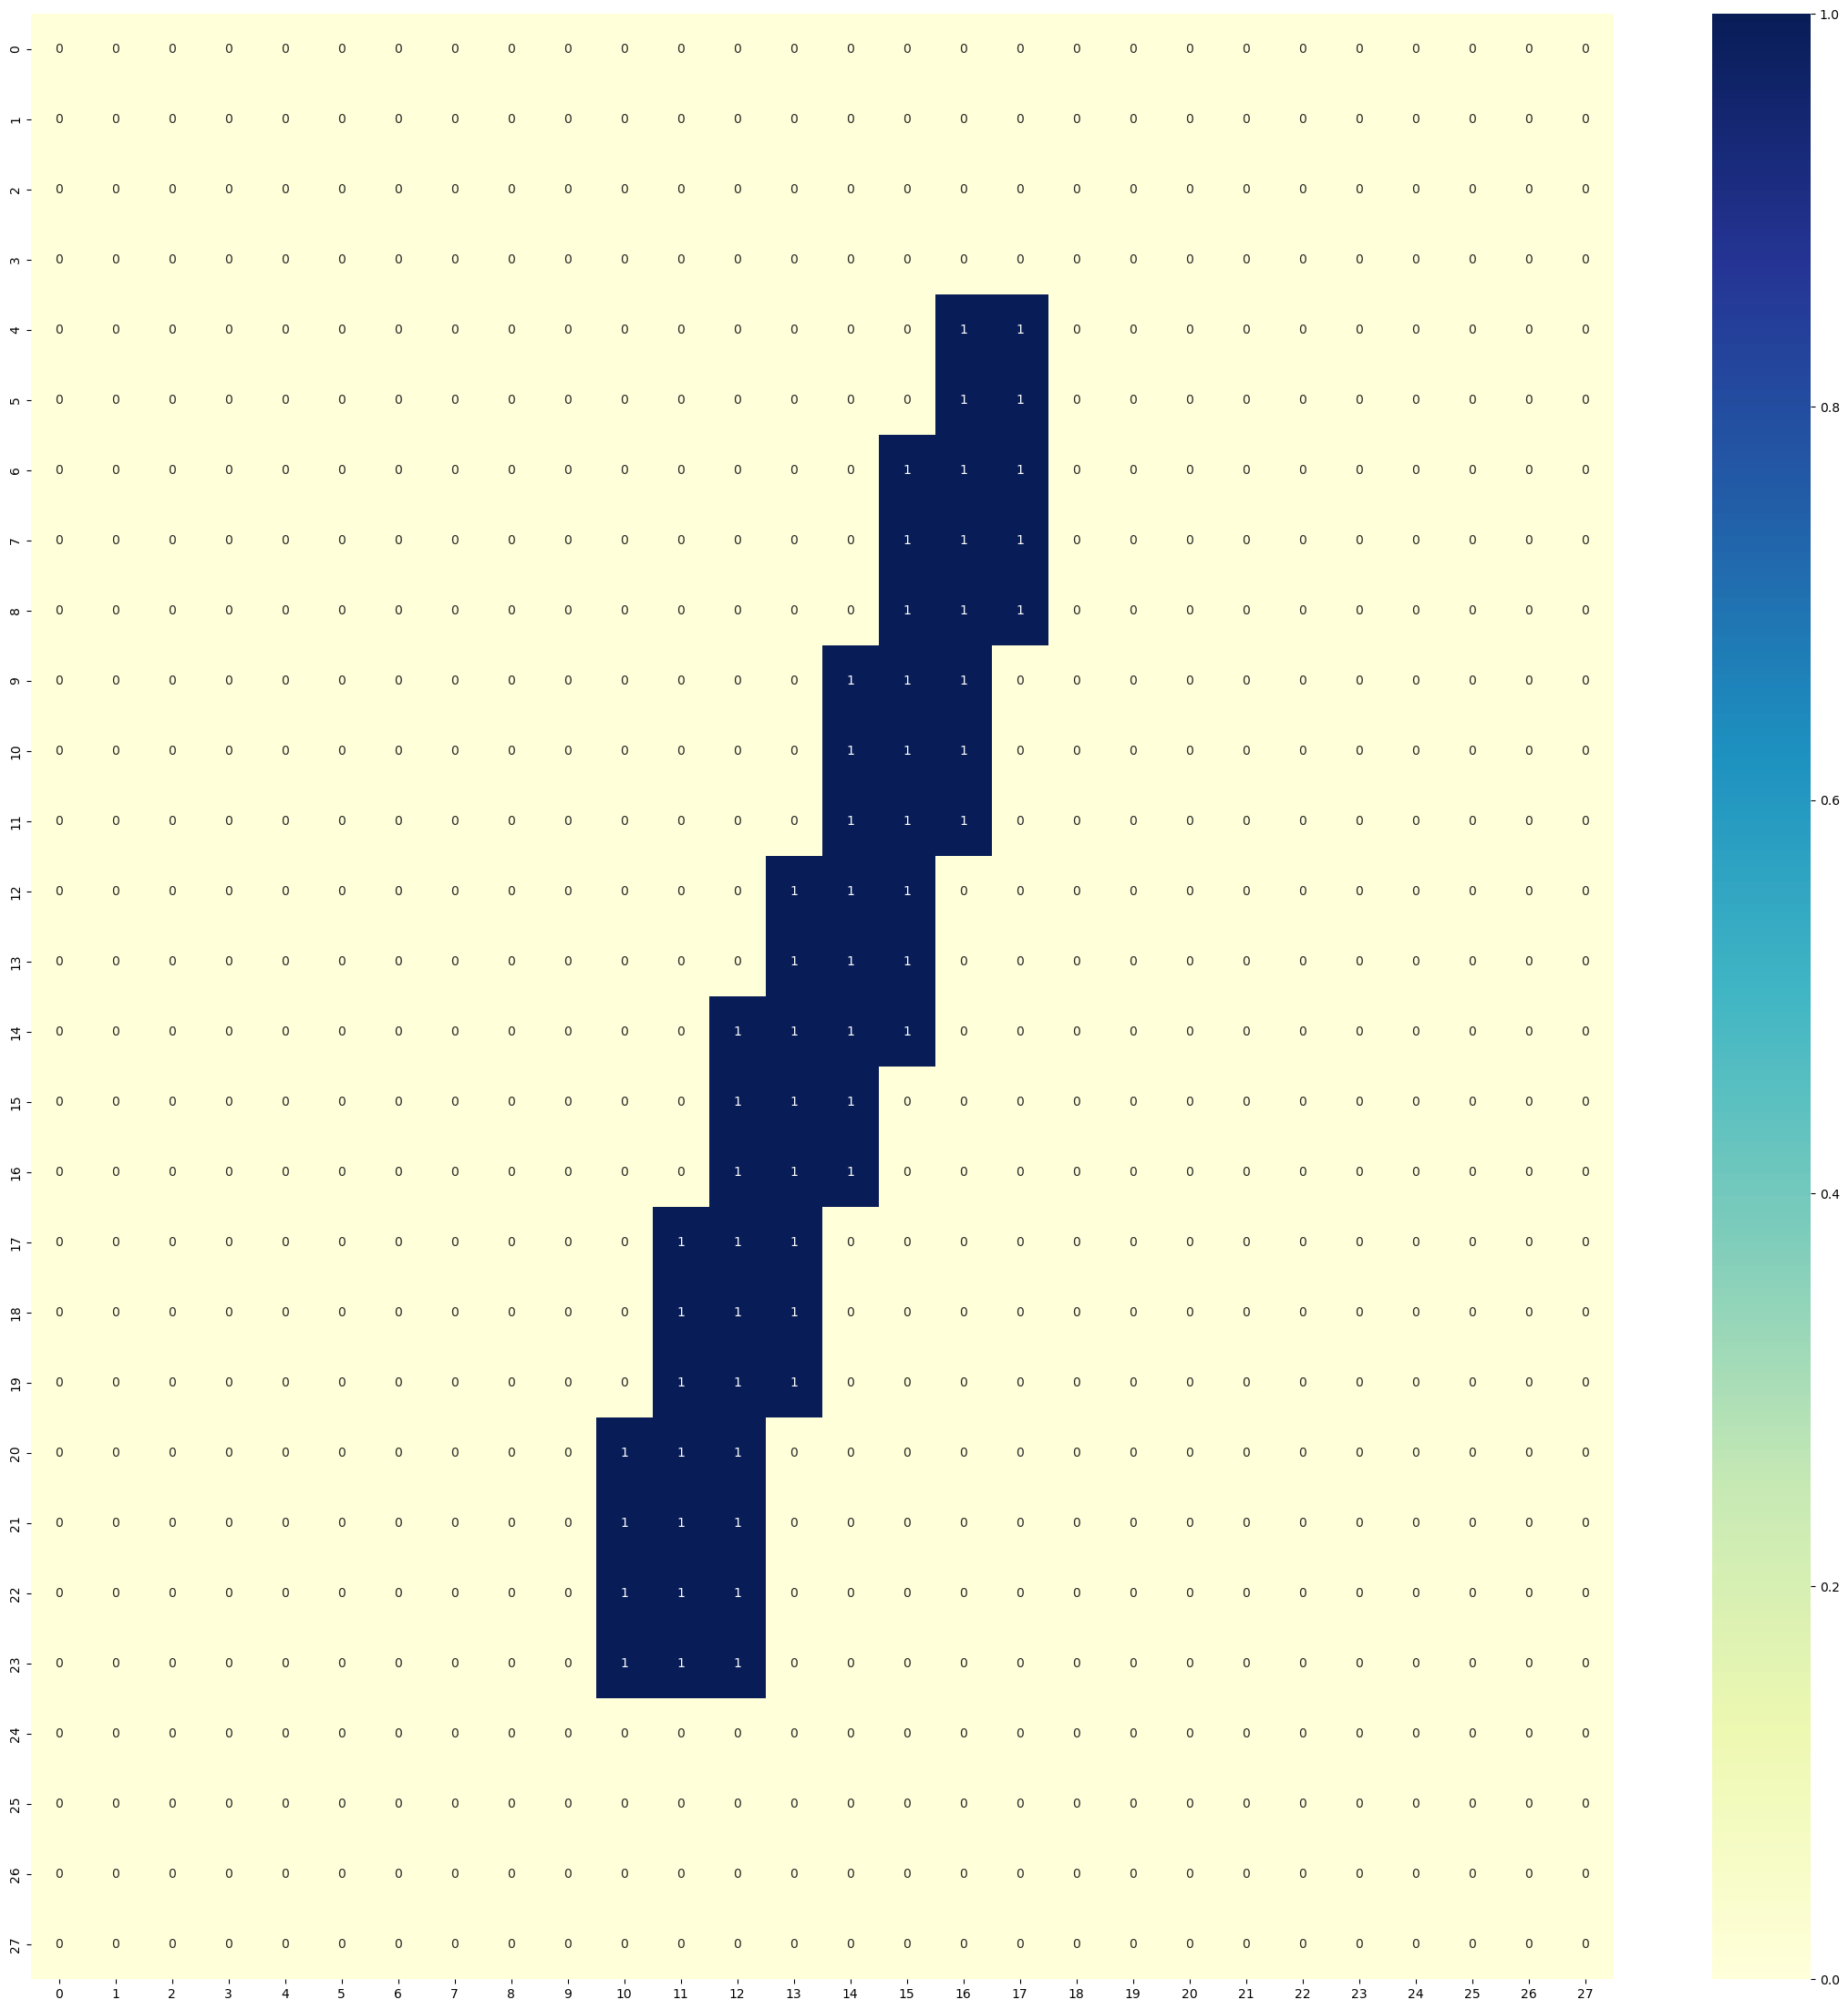

In [14]:
database = pd.read_csv('mnist_sample_binary.csv', sep=',')
# choose a number between 1 and 2050 to draw
to_recover = 5
square_reference = 28

# recover a matrix from data to plot
matrix = matrix_recover(database, to_recover, square_reference)

# heatmap plot of matrix
plt.figure(figsize=(28, 28))
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

Ao tornar os dados binários, todo número menor que 128 é tratado como 0, caso contrário é tratado como 1. O resultado disso está em tratar as bordas que eram mais claras. Talvez essa abordagem não seja muito boa para números como 8 pois podem virar um grande borrão.

## Mix input filters (5TH step)

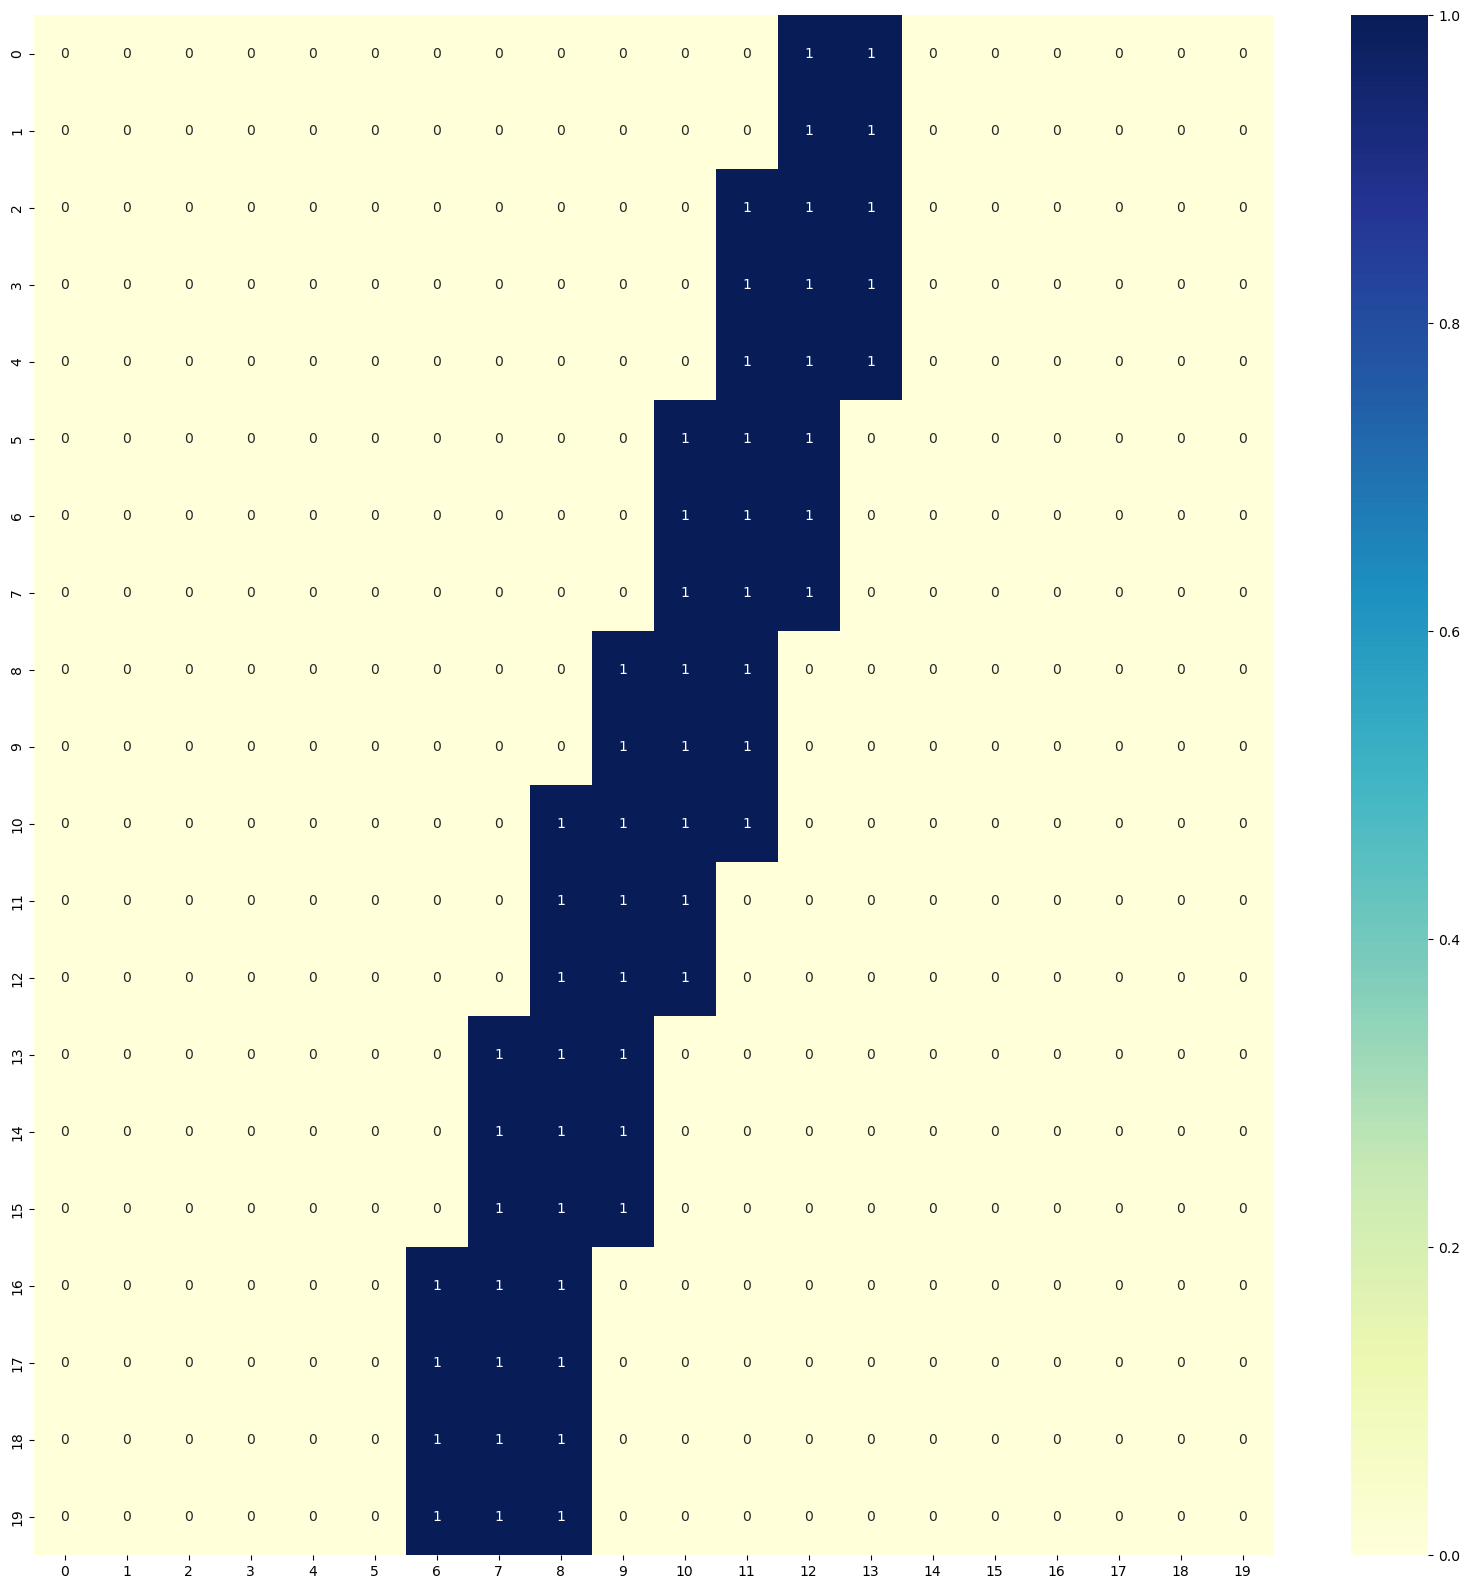

In [15]:
database = pd.read_csv('mnist_sample_feature_select_binary.csv', sep=',')
# choose a number between 1 and 2050 to draw
to_recover = 5
square_reference = 20

# recover a matrix from data to plot
matrix = matrix_recover(database, to_recover, square_reference)

# heatmap plot of matrix
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()